# Generates Fake Data Simulating a Company's Payroll

This data has small correlations tossed in between salary, bonus and performance evaluations...and a very minor correlation between gender and bonus. This correlation is enough to make the data interesting, but not enough to be able to draw conclusions.

See 'Mirages in Data Science' by June Andrews for details on how to use this notebook. Contact June at astuteajax at gmail.com to share any variations or replication experiments. Thank you!

In [1]:
"""
Generate and Save Data
"""

import matplotlib.pyplot as plt
from numpy.random import normal
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from random import random
import seaborn as sns
from scipy import stats

%matplotlib inline
import warnings; warnings.simplefilter('ignore')


def generate_salary(n_low, n_high):
    """Generates a bimodal distribution of salaries centered around the median US yearly salary
    for men and women.
    
    Args:
        n_low(int): number of salaries to pull from lower distribution
        n_high(int): number of salaries to pull from higher distribution
        
    Returns:
        (list of ints): generated salaries
    """
    salaries = [int(normal(loc=72824, scale=2500)) for i in range(n_low)]
    salaries.extend([int(normal(loc=90761, scale=4500)) for i in range(n_high)])
    np.random.shuffle(salaries)
    return salaries


def generate_person(salary):
    """Generates features representing a person with a given salary. Note minor correlations
    between bonus, salary, and gender are created.
    
    Args:
        salary(int): yearly salary
        
    Returns:
        (salary, bonus, performance, likability, gender)
    """
    slack_thank_yous = int((random() * salary) / 100000.0 * 578)
    managerial_assessment = round(random() - 0.5, 2)
    gender = 0 if random() < 0.3 else 1
    bonus = int(salary * (random() / 8 + 0.01 if gender == 0 else random() / 8))
    
    return [salary, bonus, slack_thank_yous, managerial_assessment, gender]


# Generate People
people_df = pd.DataFrame(
    [generate_person(salary) for salary in generate_salary(int(83 * 0.3), int(83 * 0.7))],
    columns=['Salary', 'Bonus', 'Slack Thank Yous', 'Managerial Assessment', 'Gender']
)
people_df.to_csv('company_a_payroll.csv', index=False)

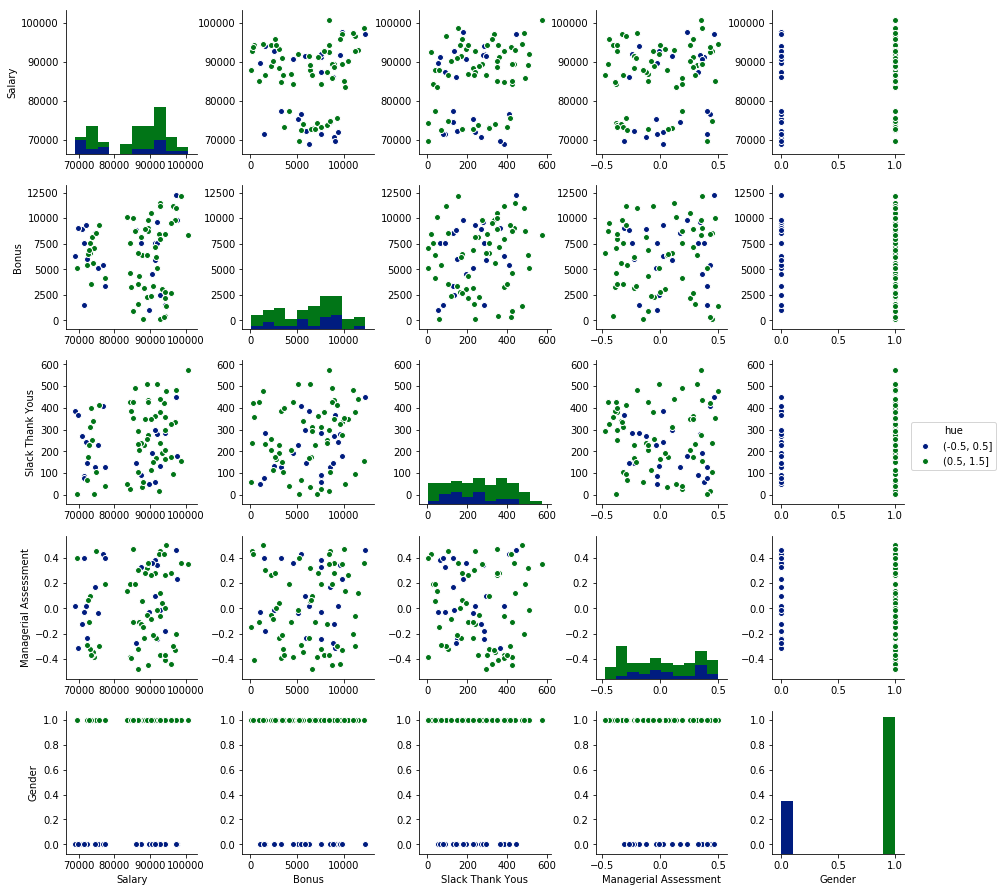

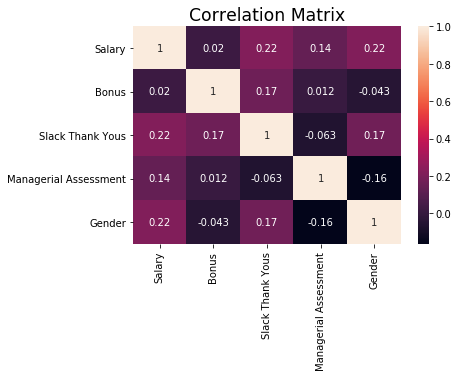

In [2]:
"""
Visualize the Generated Data.

Note, if you don't like the 'look' of the data, regenerate. Regenerate if salary does not appear bi-modal
or if correlations are too high or too little throughout the data. You shouldn't need to regenerate
more than 3 times to get a nice clear bimodal distribution.
"""

people_df['hue'] = pd.cut(people_df.Gender, bins=np.linspace(-0.5, 1.5, 3))
g = sns.pairplot(
    people_df,
    hue="hue",
    hue_order=people_df.hue.cat.categories,
    palette="dark"
)

fig = plt.figure()
ax = fig.add_subplot(111)
corr = people_df.corr()
sns.heatmap(
    corr,
    ax=ax,
    annot=True,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)
ax.set_title('Correlation Matrix', size='xx-large')
plt.show()